In [19]:
import pandas as pd
import numpy as np
import pickle
# Read the Pickle file
ft8_data=pickle.load(open("Myft8Spots.pkl","rb"))
# Cheery pick just the propery dictionary from the GeoJSON data
qso=[n['properties'] for n in dict(ft8_data)['features']]
# Make a small data frame
df=pd.DataFrame.from_records(qso)

In [20]:
df.head()

,band,call,when,distance,heading
0,40,JP7RTJ,10,3342.228670,32.070216
1,20,BG7BDB,10,1784.337242,334.593156
2,40,YE0TUR,10,2850.978689,213.300844
3,20,BD7BS,10,1784.337242,334.593156
4,20,BH8PHG,10,1979.938553,316.099033


In [21]:
# Remove the non Contest Bands
df=df.query('band != 12').query('band != 18').query('band !=30')

# See how much per band per hour

We would expect the lower bands to be better during darkness.

In [48]:
df_band_hour = pd.DataFrame(df.groupby(['band','when'])['call'].size().to_frame('traffic'))

In [49]:
df_band_hour.replace(np.NaN,0,inplace=True)
df_band_hour.reset_index(inplace=True)
#df_band_hour.set_index('band',inplace=True)
df_band_hour.head()

,band,when,traffic
0,10,0,2
1,10,8,2
2,10,9,6
3,10,10,21
4,10,11,21


# Lets Graph this 

In [50]:
import matplotlib.pyplot as plt 

In [51]:
df_band_hour.iloc

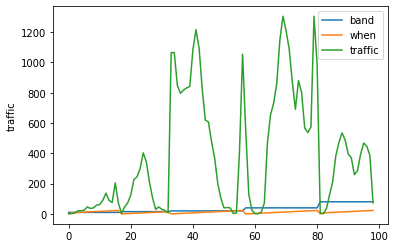

In [52]:
df_band_hour.plot(kind='line')
plt.ylabel('traffic')
plt.xlabel=('when')
plt.show()

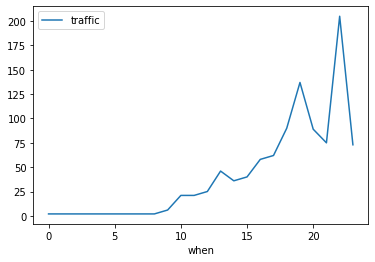

In [54]:

fig, axes = plt.subplots(nrows=2, ncols=2)

df1.plot(ax=axes[0,0])
df2.plot(ax=axes[0,1])

df_band_hour[df_band_hour.band==10].plot(x='when', y='traffic',kind='line',ax=axes=[0,0])

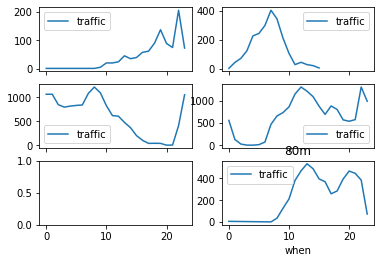

In [71]:
#fig, axes = plt.subplots(nrows=2, ncols=2,sharex=True)
fig, axs = plt.subplots(3,2,sharex=True)
df_band_hour[df_band_hour.band==10].plot(x='when', y='traffic',kind='line', ax=axs[0,0])
plt.title('10m')
df_band_hour[df_band_hour.band==15].plot(x='when', y='traffic',kind='line', ax=axs[0,1])
plt.title('15m')
df_band_hour[df_band_hour.band==20].plot(x='when', y='traffic',kind='line',ax=axs[1,0])
plt.title('20m')
df_band_hour[df_band_hour.band==40].plot(x='when', y='traffic',kind='line', ax=axs[1,1])
plt.title('40m')
df_band_hour[df_band_hour.band==80].plot(x='when', y='traffic',kind='line', ax=axs[2,1])
plt.title('80m')
plt.show()



In [56]:
df_band_hour.plot?

Signature:      df_band_hour.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x11772ac40>
File:           ~/pe38/lib/python3.8/site-packages/pandas/plotting/_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    -